In [ ]:
from IPython.display import clear_output

In [ ]:
!unzip yolov5_format.zip 
clear_output()

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 3773 (delta 68), reused 69 (delta 33), pack-reused 3662
Receiving objects: 100% (3773/3773), 7.14 MiB | 35.17 MiB/s, done.
Resolving deltas: 100% (2522/2522), done.
/content/yolov5
     |████████████████████████████████| 276kB 22.2MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=d88e5324835ae0ceb213b7c87c869383502e627081e87b896b03fc9689b38386
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!cp /content/yolov5/data/coco128.yaml ../

In [ ]:
!python train.py --img 640 --batch 4 --epochs 50 \
  --data /content/fruits.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt \
  --name fruits_yolo --cache

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='/content/fruits.yaml', device='', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='fruits_yolo', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/fruits_yolo', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-30 06:13:42.253580: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.

In [ ]:
!python detect.py --source /content/yolov5_format/images/test/apple_80.jpg  --weights yolov5s.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov5_format/images/test/apple_80.jpg', update=False, view_img=False, weights=['yolov5s.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 232 layers, 7459581 parameters, 0 gradients, 17.5 GFLOPS
image 1/1 /content/yolov5_format/images/test/apple_80.jpg: 544x640 1 apples, Done. (0.014s)
Results saved to runs/detect/exp3
Done. (0.041s)


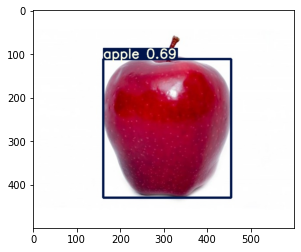

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("runs/detect/exp3/apple_80.jpg")
plt.imshow(img[:,:,::-1])